<a href="https://colab.research.google.com/github/InowaR/colab/blob/main/OpenVLA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# T4 GPU

In [ ]:
!pip install -r https://raw.githubusercontent.com/openvla/openvla/main/requirements-min.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.8/59.8 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.0/138.0 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 90.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 98.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 104.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 81.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9

In [ ]:
from transformers import AutoModelForVision2Seq, AutoProcessor
from PIL import Image

import torch

# Load Processor & VLA
processor = AutoProcessor.from_pretrained("openvla/openvla-7b", trust_remote_code=True)
vla = AutoModelForVision2Seq.from_pretrained(
    "openvla/openvla-7b",
    torch_dtype=torch.bfloat16,
    low_cpu_mem_usage=True,
    trust_remote_code=True
).to("cuda:0")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


processor_config.json:   0%|          | 0.00/130 [00:00<?, ?B/s]

processing_prismatic.py:   0%|          | 0.00/12.7k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/openvla/openvla-7b:
- processing_prismatic.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/1.65k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.19k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/21.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/60.7k [00:00<?, ?B/s]

configuration_prismatic.py:   0%|          | 0.00/5.87k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/openvla/openvla-7b:
- configuration_prismatic.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_prismatic.py:   0%|          | 0.00/26.1k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/openvla/openvla-7b:
- modeling_prismatic.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


model.safetensors.index.json:   0%|          | 0.00/94.8k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/6.95G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/6.97G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/1.16G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/136 [00:00<?, ?B/s]

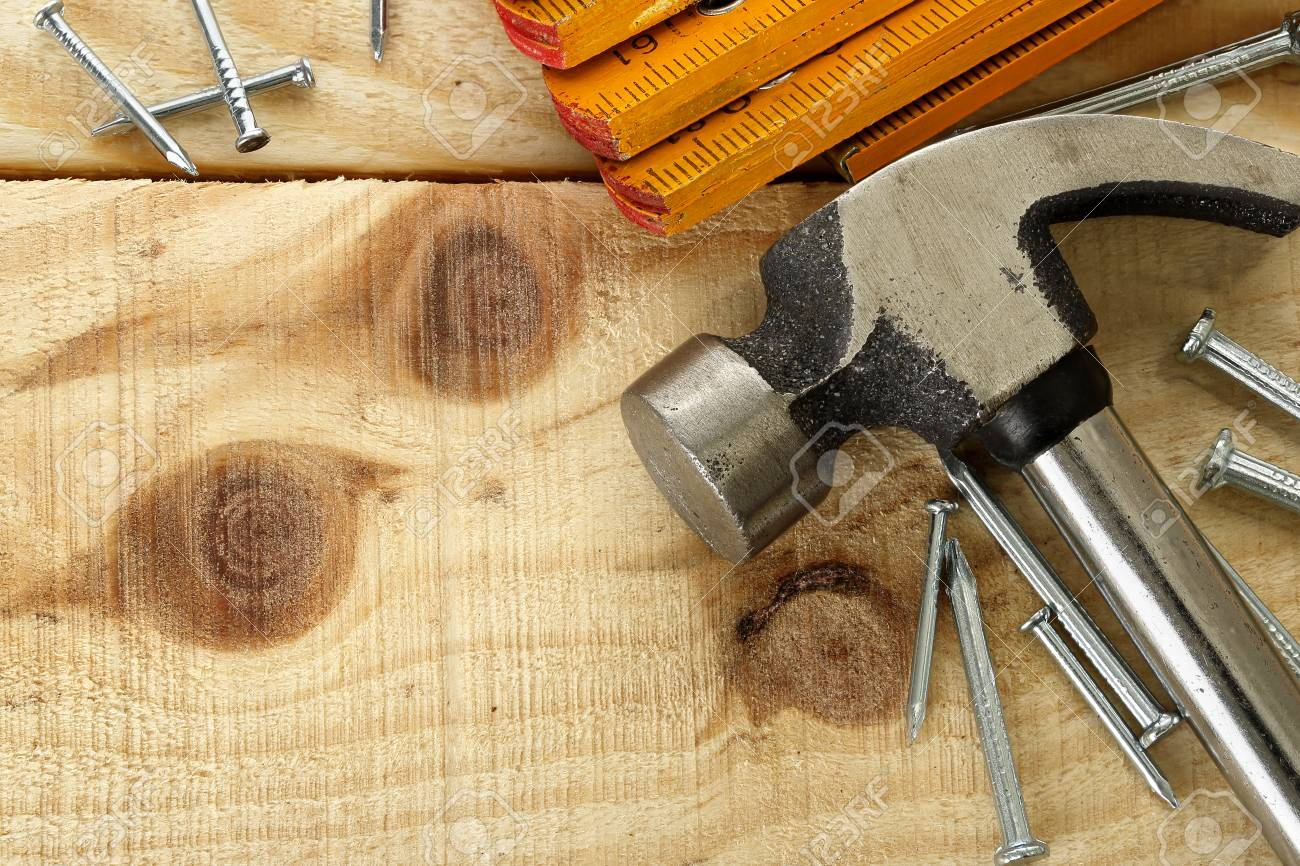

In [ ]:
image = Image.open("image.jpg")
image

In [ ]:
prompt = "In: What action should the robot take to {<INSTRUCTION>}?\nOut:"

# Predict Action (7-DoF; un-normalize for BridgeData V2)
inputs = processor(prompt, image).to("cuda:0", dtype=torch.bfloat16)
action = vla.predict_action(**inputs, unnorm_key="bridge_orig", do_sample=False)

print(action) # команды

[-2.08787322e-04  8.96491228e-03  2.49618080e-02 -5.18650133e-02
 -3.42738332e-02 -6.67113405e-05  9.96078431e-01]


In [ ]:
!pip install pybullet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 MB 10.4 MB/s eta 0:00:00


In [ ]:
import pybullet as p

# Подключение к роботу (пример для Franka Panda)
robot_id = p.loadURDF("franka_panda/panda.urdf")

# Получение управления суставами из предсказанного действия
target_joint_positions = convert_action_to_joints(action)  # Нужна ваша реализация

# Установка целевых положений
for i, pos in enumerate(target_joint_positions):
    p.setJointMotorControl2(robot_id, i, p.POSITION_CONTROL, pos)

error: Not connected to physics server.